In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
import matplotlib.dates as mdates

In [274]:
df_national = pd.read_csv('data/national-history.csv')
df_national['date'] = pd.to_datetime(df_national['date'])
df_national

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,2020-01-16,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,2020-01-15,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
418,2020-01-14,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0


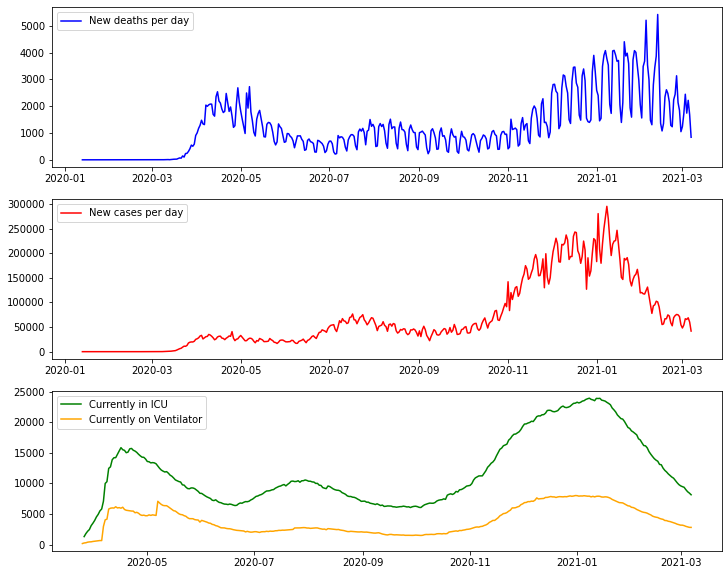

In [275]:
figs, axes = plt.subplots(3,1, figsize = (12,10))
axes[0].plot(df_national['date'], df_national['deathIncrease'], label='New deaths per day', color='blue')
axes[1].plot(df_national['date'], df_national['positiveIncrease'], label='New cases per day', color='red')
axes[2].plot(df_national['date'], df_national['inIcuCurrently'], label='Currently in ICU', color='green')
axes[2].plot(df_national['date'], df_national['onVentilatorCurrently'], label='Currently on Ventilator', color = 'orange')
for i in range(3):
  axes[i].legend()
plt.show()
#13/3/2020: The Trump Administration declares a nationwide emergency and issues an additional travel ban on non-U.S. citizens traveling from 26 European countries due to COVID-19.
#15/3/2020: States begin to implement shutdowns in order to prevent the spread of COVID-19.
#21/2/2021: The recorded COVID-19 death toll in the U.S. surpasses 500,000 during the peak period.
#8/3/2021: CDC recommends that people who are fully vaccinated against COVID-19 can safely gather with other fully vaccinated people indoors without masks and without socially distancing.

In [276]:
df_vaccinations = pd.read_csv('data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
df_vaccinations['Date'] = pd.to_datetime(df_vaccinations['Date'])
df_vaccinations.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf,Administered_Bivalent,Admin_Bivalent_PFR,Admin_Bivalent_MOD,Dist_Bivalent_PFR,Dist_Bivalent_MOD
0,2022-10-05,40,MP,137730,3600,27820,106110,200.0,0,265627,...,24.6,1.0,307.0,1680.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2022-10-05,40,VA,23506285,799000,8262800,14423485,21000.0,0,275394,...,48.7,834.0,388701.0,502798.0,386.0,NaN,NaN,NaN,NaN,NaN
2,2022-10-05,40,BP2,383030,16200,167420,199410,0.0,0,0,...,31.5,3.0,2430.0,1790.0,2.0,NaN,NaN,NaN,NaN,NaN
3,2022-10-05,40,WA,21745395,773500,7835800,13112595,23500.0,0,285564,...,56.8,717.0,423009.0,559634.0,483.0,NaN,NaN,NaN,NaN,NaN
4,2022-10-05,40,WY,1145885,49200,493640,601045,2000.0,0,197990,...,39.5,23.0,16279.0,18381.0,35.0,NaN,NaN,NaN,NaN,NaN


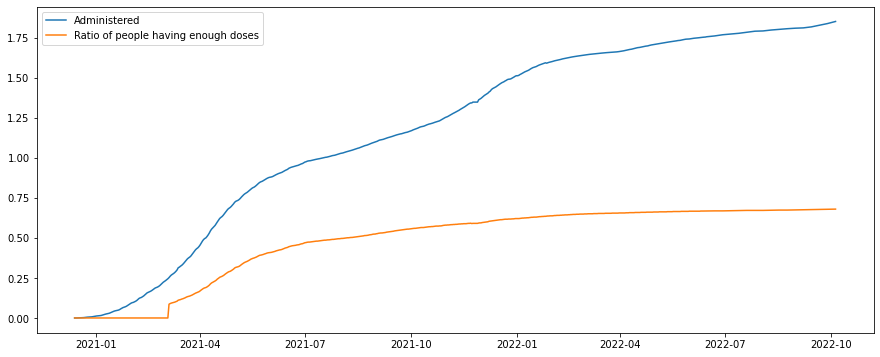

In [277]:
df_vaccinations_us = df_vaccinations[df_vaccinations['Location'] == 'US']
population = 337000000
plt.figure(figsize = (15,6))
plt.plot(df_vaccinations_us['Date'], df_vaccinations_us['Administered']/population, label='Administered')
plt.plot(df_vaccinations_us['Date'], df_vaccinations_us['Series_Complete_Pop_Pct']/100, label='Ratio of people having enough doses')
plt.legend()
plt.show()

In [278]:
#df contains all the training and testing data points and the targets from the start until before the second peak period.
df = df_national[(df_national['inIcuCurrently'] > 0) & (df_national['date'] < '2020-12-01')][['date','positiveIncrease','deathIncrease','inIcuCurrently','onVentilatorCurrently']]
df

,date,positiveIncrease,deathIncrease,inIcuCurrently,onVentilatorCurrently
97,2020-11-30,150031,1037,18807.0,6520.0
98,2020-11-29,137254,825,18437.0,6245.0
99,2020-11-28,151469,1243,18249.0,6148.0
100,2020-11-27,198874,1404,18056.0,6028.0
101,2020-11-26,129764,1392,18019.0,5986.0
...,...,...,...,...,...
342,2020-03-30,21139,584,3087.0,449.0
343,2020-03-29,19683,506,2456.0,433.0
344,2020-03-28,19785,550,2174.0,390.0
345,2020-03-27,19215,411,1792.0,293.0


In [279]:
def create_consecutive_columns(days, df):
    data_copy = df.copy()
    i = 1
    while i < days:
        data_copy[f'deathIncrease_{i+1}'] = data_copy['deathIncrease'].shift(-i)
        data_copy[f'positiveIncrease_{i+1}'] = data_copy['positiveIncrease'].shift(-i)
        i = i + 1
    if i == days:
        target_icu = data_copy['inIcuCurrently'].shift(-i)
        target_ventilators = data_copy['onVentilatorCurrently'].shift(-i)
        
    data_copy = data_copy.dropna(axis=0) #Drop rows with NaN values
    target_icu, target_ventilators = target_icu.dropna(), target_ventilators.dropna()
    rows = target_icu.shape[0]
    data_copy = data_copy[:rows]
    print(data_copy.shape)
    data_copy = data_copy.drop(columns=['inIcuCurrently','onVentilatorCurrently'])
    return data_copy, target_icu, target_ventilators

data, target_icu, target_ventilators = create_consecutive_columns(4, df.drop(columns=['date']))

(246, 10)


In [280]:
data

,positiveIncrease,deathIncrease,deathIncrease_2,positiveIncrease_2,deathIncrease_3,positiveIncrease_3,deathIncrease_4,positiveIncrease_4
97,150031,1037,825.0,137254.0,1243.0,151469.0,1404.0,198874.0
98,137254,825,1243.0,151469.0,1404.0,198874.0,1392.0,129764.0
99,151469,1243,1404.0,198874.0,1392.0,129764.0,2281.0,188496.0
100,198874,1404,1392.0,129764.0,2281.0,188496.0,2091.0,166503.0
101,129764,1392,2281.0,188496.0,2091.0,166503.0,853.0,154696.0
...,...,...,...,...,...,...,...,...
338,31835,1288,1175.0,28135.0,1006.0,26204.0,909.0,25000.0
339,28135,1175,1006.0,26204.0,909.0,25000.0,584.0,21139.0
340,26204,1006,909.0,25000.0,584.0,21139.0,506.0,19683.0
341,25000,909,584.0,21139.0,506.0,19683.0,550.0,19785.0


In [285]:
from sklearn.model_selection import train_test_split
#80% for training, 20% for testing
data_train, data_test, target_icu_train, target_icu_test = train_test_split(data.reset_index(drop=True), target_icu, test_size=0.2)
idx_train, idx_test = data_train.index, data_test.index
target_ventilator_train, target_ventilator_test = target_ventilators.iloc[idx_train], target_ventilators.iloc[idx_test]
data_train

,positiveIncrease,deathIncrease,deathIncrease_2,positiveIncrease_2,deathIncrease_3,positiveIncrease_3,deathIncrease_4,positiveIncrease_4
62,36766,724,246.0,35376.0,310.0,34990.0,873.0,47227.0
126,54484,1066,561.0,60768.0,1012.0,64788.0,1174.0,75095.0
138,69372,864,742.0,58618.0,329.0,57144.0,471.0,61602.0
98,34543,341,577.0,37900.0,1035.0,46033.0,1119.0,46477.0
24,129990,1185,1154.0,119023.0,1131.0,105996.0,1517.0,119949.0
...,...,...,...,...,...,...,...,...
36,64471,391,896.0,83792.0,949.0,82575.0,1094.0,72273.0
7,154696,853,923.0,154188.0,1551.0,186385.0,1910.0,197164.0
28,83454,475,410.0,141974.0,958.0,91293.0,947.0,97942.0
159,39131,704,728.0,33446.0,288.0,26817.0,291.0,29182.0


In [286]:
#preparing the data during the peak period (spike)
df_spike = df_national[df_national['date'] >= '2020-11-27'][['date','positiveIncrease','deathIncrease','inIcuCurrently','onVentilatorCurrently']]
data_spike, target_icu_spike, target_ventilators_spike = create_consecutive_columns(4, df_spike.drop(columns=['date']))
idx_needs_correction = data_spike.index
data_spike

(97, 10)


,positiveIncrease,deathIncrease,deathIncrease_2,positiveIncrease_2,deathIncrease_3,positiveIncrease_3,deathIncrease_4,positiveIncrease_4
0,41835,842,1680.0,60015.0,2221.0,68787.0,1743.0,65487.0
1,60015,1680,2221.0,68787.0,1743.0,65487.0,2449.0,66836.0
2,68787,2221,1743.0,65487.0,2449.0,66836.0,1728.0,54248.0
3,65487,1743,2449.0,66836.0,1728.0,54248.0,1241.0,48092.0
4,66836,2449,1728.0,54248.0,1241.0,48092.0,1051.0,54349.0
...,...,...,...,...,...,...,...,...
92,219070,2486,2563.0,230313.0,2822.0,216271.0,2811.0,203429.0
93,230313,2563,2822.0,216271.0,2811.0,203429.0,2489.0,181183.0
94,216271,2822,2811.0,203429.0,2489.0,181183.0,1037.0,150031.0
95,203429,2811,2489.0,181183.0,1037.0,150031.0,825.0,137254.0


In [287]:
target_icu

97     18019.0
98     17738.0
99     17317.0
100    17060.0
101    16411.0
        ...   
338     3087.0
339     2456.0
340     2174.0
341     1792.0
342     1299.0
Name: inIcuCurrently, Length: 246, dtype: float64

In [288]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [289]:
#Implement the mean absolute percentage error function
def mape(target, preds):
  return np.mean(np.sqrt((preds - target)**2)/target) * 100

In [290]:
gbr = GradientBoostingRegressor()
gbr.fit(data_train, target_icu_train) #fitting the training set
gbr_icu_train_preds = gbr.predict(data_train) #predicting for the training set
print(f'Mean squared percentage error for training dataset using Gradient Boosting Regressor model: {mape(gbr_icu_train_preds, target_icu_train):.2f}%')
gbr_icu_test_preds = gbr.predict(data_test) #predicting for the testing set
print(f'Mean squared percentage error for testing dataset using Gradient Boosting Regressor model: {mape(gbr_icu_test_preds, target_icu_test):.2f}%')

Mean squared percentage error for training dataset using Gradient Boosting Regressor model: 4.46%
Mean squared percentage error for testing dataset using Gradient Boosting Regressor model: 14.12%


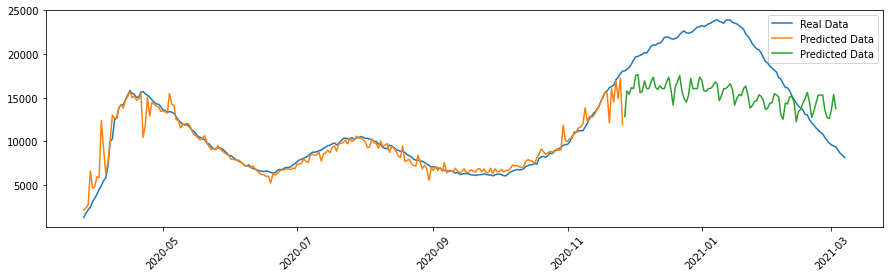

In [291]:
df_gbr_icu_train = pd.DataFrame(gbr_icu_train_preds, index = idx_train)
df_gbr_icu_test = pd.DataFrame(gbr_icu_test_preds, index = idx_test)
df_gbr_icu = pd.concat([df_gbr_icu_train, df_gbr_icu_test], axis=0).sort_index(ascending=True)
gbr_spike_preds = gbr.predict(data_spike)
plt.figure(figsize=(15,4))
plt.plot(df_national['date'], df_national['inIcuCurrently'], label='Real Data')
plt.plot(df['date'][4:], df_gbr_icu.values, label='Predicted Data')
plt.plot(df_spike['date'][4:], gbr_spike_preds, label='Predicted Data')
plt.xticks(rotation=45)
plt.legend()

In [292]:
forest = RandomForestRegressor()
forest.fit(data_train, target_icu_train)
forest_icu_train_preds = forest.predict(data_train)
print(f'Mean squared percentage error for training dataset using Random Forest Regressor model: {mape(forest_icu_train_preds, target_icu_train):.2f}%')
forest_icu_test_preds = forest.predict(data_test)
print(f'Mean squared percentage error for testing dataset using Random Forest Regressor model: {mape(forest_icu_test_preds, target_icu_test):.2f}%')

Mean squared percentage error for training dataset using Random Forest Regressor model: 5.35%
Mean squared percentage error for testing dataset using Random Forest Regressor model: 12.03%


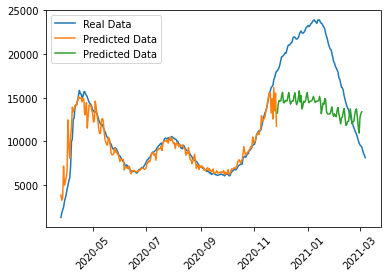

In [293]:
df_forest_icu_train = pd.DataFrame(forest_icu_train_preds, index = idx_train)
df_forest_icu_test = pd.DataFrame(forest_icu_test_preds, index = idx_test)
df_forest_icu = pd.concat([df_forest_icu_train, df_forest_icu_test], axis=0).sort_index(ascending=True)
forest_spike_preds = forest.predict(data_spike)
plt.plot(df_national['date'], df_national['inIcuCurrently'], label='Real Data')
plt.plot(df['date'][4:], df_forest_icu.values, label='Predicted Data')
plt.plot(df_spike['date'][4:], forest_spike_preds, label='Predicted Data')
plt.xticks(rotation=45)
plt.legend()

In [294]:
from torch import tensor
tensor_icu = tensor(target_icu.values) #turning the icu values into a tensor
tensor_icu_max,tensor_icu_indices = tensor_icu.max(dim=0) #getting the maximum value of tensor_icu
tensor_icu = tensor_icu / tensor_icu_max #dividing each element by the largest value to scale all the numbers from 0 to 1
tensor_icu

tensor([1.0000, 0.9844, 0.9610, 0.9468, 0.9108, 0.9026, 0.8961, 0.8746, 0.8634,
        0.8330, 0.8031, 0.7686, 0.7487, 0.7370, 0.7169, 0.7007, 0.6691, 0.6458,
        0.6228, 0.6224, 0.6223, 0.6132, 0.6045, 0.5848, 0.5526, 0.5364, 0.5335,
        0.5300, 0.5172, 0.5069, 0.4986, 0.4965, 0.4767, 0.4814, 0.4630, 0.4540,
        0.4601, 0.4554, 0.4475, 0.4097, 0.4143, 0.4070, 0.4053, 0.4016, 0.3943,
        0.3807, 0.3745, 0.3747, 0.3760, 0.3715, 0.3658, 0.3602, 0.3492, 0.3361,
        0.3370, 0.3438, 0.3475, 0.3464, 0.3425, 0.3356, 0.3424, 0.3409, 0.3452,
        0.3482, 0.3441, 0.3434, 0.3406, 0.3385, 0.3420, 0.3427, 0.3488, 0.3498,
        0.3501, 0.3472, 0.3459, 0.3579, 0.3536, 0.3620, 0.3696, 0.3630, 0.3682,
        0.3719, 0.3750, 0.3842, 0.3842, 0.3935, 0.3931, 0.3915, 0.4034, 0.4114,
        0.4213, 0.4280, 0.4297, 0.4359, 0.4359, 0.4411, 0.4555, 0.4638, 0.4709,
        0.4854, 0.4916, 0.4929, 0.4971, 0.5043, 0.5148, 0.5261, 0.5308, 0.5070,
        0.5111, 0.5165, 0.5362, 0.5382, 

In [295]:
tensor_ventilators = tensor(target_ventilators.values)
tensor_ventilators_max,tensor_ventilators_indices = tensor_ventilators.max(dim=0)
tensor_ventilators = tensor_ventilators / tensor_ventilators_max
tensor_ventilators

tensor([0.8470, 0.8472, 0.7961, 0.7719, 0.7405, 0.7221, 0.7157, 0.6877, 0.6649,
        0.6196, 0.5881, 0.5574, 0.5582, 0.5329, 0.5125, 0.4762, 0.4531, 0.4402,
        0.4213, 0.4170, 0.4033, 0.4070, 0.4007, 0.3869, 0.3726, 0.3613, 0.3540,
        0.3505, 0.3395, 0.3331, 0.3231, 0.3255, 0.3079, 0.3156, 0.3085, 0.3038,
        0.2948, 0.2889, 0.2553, 0.2493, 0.2534, 0.2462, 0.2509, 0.2512, 0.2486,
        0.2353, 0.2329, 0.2359, 0.2336, 0.2318, 0.2335, 0.2277, 0.2142, 0.2101,
        0.2124, 0.2171, 0.2183, 0.2137, 0.2118, 0.2141, 0.2138, 0.2135, 0.2134,
        0.2207, 0.2186, 0.2205, 0.2222, 0.2257, 0.2231, 0.2275, 0.2352, 0.2331,
        0.2227, 0.2265, 0.2340, 0.2435, 0.2570, 0.2721, 0.2697, 0.2646, 0.2662,
        0.2706, 0.2768, 0.2827, 0.2884, 0.2868, 0.2888, 0.2943, 0.2911, 0.2918,
        0.2953, 0.3011, 0.3032, 0.3058, 0.2989, 0.3015, 0.3119, 0.3238, 0.3297,
        0.3361, 0.3491, 0.3458, 0.3511, 0.3574, 0.3615, 0.3642, 0.3682, 0.3427,
        0.3579, 0.3547, 0.3631, 0.3719, 

In [296]:
tensor_data = tensor(data.values, dtype=torch.float)
tensor_data_max,tensor_data_indices = tensor_data.max(dim=0)
tensor_data = tensor_data / tensor_data_max #scaling the numbers between 0 and 1 
tensor_data

tensor([[0.7544, 0.3796, 0.3020,  ..., 0.7616, 0.5139, 1.0000],
        [0.6902, 0.3020, 0.4550,  ..., 1.0000, 0.5095, 0.6525],
        [0.7616, 0.4550, 0.5139,  ..., 0.6525, 0.8349, 0.9478],
        ...,
        [0.1318, 0.3682, 0.3327,  ..., 0.1063, 0.1852, 0.0990],
        [0.1257, 0.3327, 0.2138,  ..., 0.0990, 0.2013, 0.0995],
        [0.1063, 0.2138, 0.1852,  ..., 0.0995, 0.1504, 0.0966]])

In [297]:
def calc_preds(coeffs, data):
  return (data*coeffs).sum(axis=1)

def calc_loss(coeffs, data, target):#mean absolute error
  return torch.abs(calc_preds(coeffs, data) - target).mean()

In [298]:
trn_indep,test_indep = tensor_data[idx_train], tensor_data[idx_test]
trn_icu,test_icu = tensor_icu[idx_train], tensor_icu[idx_test]
trn_ventilators, test_ventilators = tensor_ventilators[idx_train], tensor_ventilators[idx_test]
len(trn_indep),len(test_indep)

(196, 50)

In [299]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr) #update the coefficients: new = old - gradients * learning rate
    coeffs.grad.zero_()

In [300]:
def one_epoch_icu(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_icu) #calculate the loss
    loss.backward() #calculate all the gradients
    with torch.no_grad(): update_coeffs(coeffs, lr) #update the coefficients using gradient descent
    print(f"{loss:.3f}", end="; ")

def one_epoch_ventilators(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_ventilators)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [301]:
def init_coeffs(): return (torch.rand(8)-0.5).requires_grad_() #randomly initilize the 8 coefficients from -1 to 1

In [302]:
def train_model_icu(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs_icu = init_coeffs() #initilize the coefficients
    for i in range(epochs): one_epoch_icu(coeffs_icu, lr=lr) #update the coeffs w/ GD with the number of steps equal to epochs
    return coeffs_icu

In [303]:
def train_model_ventilators(epochs=30, lr=0.01):
    min_loss = 100
    torch.manual_seed(442)
    coeffs_ventilators = init_coeffs()
    for i in range(epochs): one_epoch_ventilators(coeffs_ventilators, lr=lr)
    return coeffs_ventilators

In [304]:
#training the coeffs for icu prediction with 15 epochs and 0.2 learning rate
coeffs_icu = train_model_icu(15, lr=0.2)

0.466; 0.309; 0.181; 0.115; 0.103; 0.098; 0.094; 0.091; 0.088; 0.086; 0.084; 0.083; 0.082; 0.081; 0.080; 

In [305]:
#training the coeffs for ventilators prediction with 30 epochs and 0.2 learning rate
coeffs_ventilators = train_model_ventilators(30, lr=0.2)

0.384; 0.241; 0.128; 0.116; 0.114; 0.113; 0.112; 0.112; 0.112; 0.111; 0.111; 0.111; 0.111; 0.111; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 0.110; 

In [306]:
calc_loss(coeffs_icu, test_indep, test_icu)

tensor(0.1016, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [307]:
calc_loss(coeffs_ventilators,test_indep, test_ventilators)

tensor(0.1282, dtype=torch.float64, grad_fn=<MeanBackward0>)

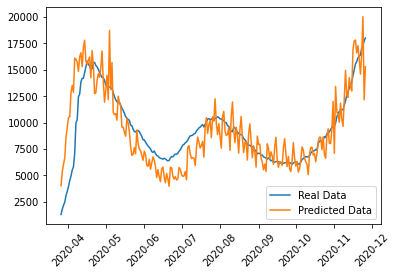

In [308]:
test_preds_icu = calc_preds(coeffs_icu, test_indep) * tensor_icu_max
trn_preds_icu = calc_preds(coeffs_icu, trn_indep) * tensor_icu_max
df_train = pd.DataFrame(trn_preds_icu.detach().numpy(), index = idx_train)
df_test = pd.DataFrame(test_preds_icu.detach().numpy(), index = idx_test)
df_icu = pd.concat([df_train, df_test], axis=0).sort_index(ascending=True)
plt.plot(df['date'][4:], target_icu, label='Real Data')
plt.plot(df['date'][4:], df_icu.values, label='Predicted Data')
plt.xticks(rotation=45)
plt.legend()


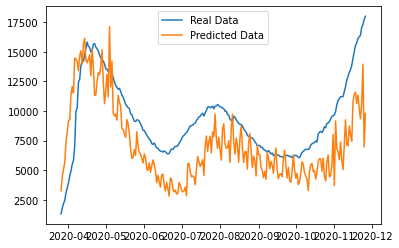

In [309]:
test_preds_ventilators = calc_preds(coeffs_ventilators, test_indep) * tensor_icu_max
trn_preds_ventilators = calc_preds(coeffs_ventilators, trn_indep) * tensor_icu_max
df_train = pd.DataFrame(trn_preds_ventilators.detach().numpy(), index = idx_train)
df_test = pd.DataFrame(test_preds_ventilators.detach().numpy(), index = idx_test)
df_ventilators = pd.concat([df_train, df_test], axis=0).sort_index(ascending=True)
plt.plot(df['date'][4:], target_icu, label='Real Data')
plt.plot(df['date'][4:], df_ventilators.values, label='Predicted Data')
plt.legend()


In [310]:
#preparing the data during the peak period (spike)
df_spike = df_national[df_national['date'] >= '2020-11-27'][['date','positiveIncrease','deathIncrease','inIcuCurrently','onVentilatorCurrently']]
data_spike, target_icu_spike, target_ventilators_spike = create_consecutive_columns(4, df_spike.drop(columns=['date']))
idx_needs_correction = data_spike.index
data_spike

(97, 10)


,positiveIncrease,deathIncrease,deathIncrease_2,positiveIncrease_2,deathIncrease_3,positiveIncrease_3,deathIncrease_4,positiveIncrease_4
0,41835,842,1680.0,60015.0,2221.0,68787.0,1743.0,65487.0
1,60015,1680,2221.0,68787.0,1743.0,65487.0,2449.0,66836.0
2,68787,2221,1743.0,65487.0,2449.0,66836.0,1728.0,54248.0
3,65487,1743,2449.0,66836.0,1728.0,54248.0,1241.0,48092.0
4,66836,2449,1728.0,54248.0,1241.0,48092.0,1051.0,54349.0
...,...,...,...,...,...,...,...,...
92,219070,2486,2563.0,230313.0,2822.0,216271.0,2811.0,203429.0
93,230313,2563,2822.0,216271.0,2811.0,203429.0,2489.0,181183.0
94,216271,2822,2811.0,203429.0,2489.0,181183.0,1037.0,150031.0
95,203429,2811,2489.0,181183.0,1037.0,150031.0,825.0,137254.0


In [311]:
tensor_data_spike = tensor(data_spike.values, dtype=torch.float)
tensor_data_spike_max, tensor_spike_data_indices = tensor_data_spike.max(dim=0)
tensor_data_spike = tensor_data_spike / tensor_data_max

In [312]:
tensor_icu_spike = tensor(target_icu_spike.values)
tensor_ventilators_spike = tensor(target_ventilators_spike.values)

In [313]:
preds_icu_spike = calc_preds(coeffs_icu, tensor_data_spike) * tensor_icu_max
preds_ventilators_spike = calc_preds(coeffs_ventilators, tensor_data_spike) * tensor_ventilators_max

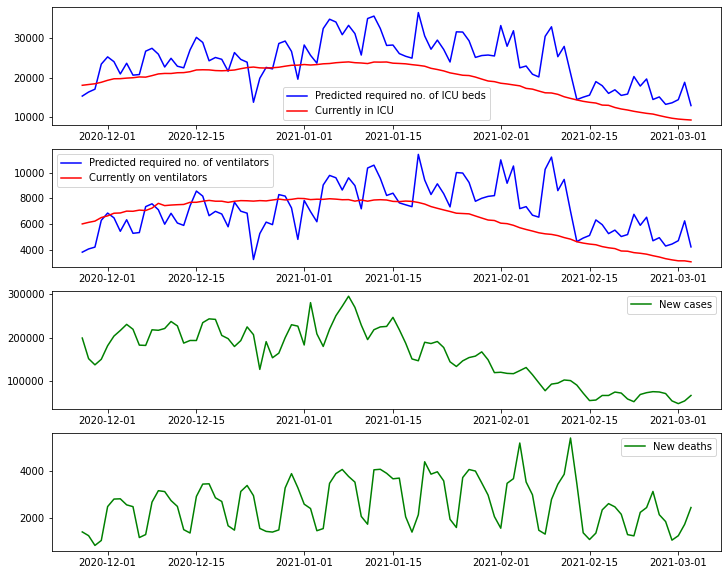

In [314]:
figs, axes = plt.subplots(4,1, figsize = (12,10))
axes[0].plot(df_spike['date'][4:], preds_icu_spike.detach().numpy(), label='Predicted required no. of ICU beds', color='blue')
axes[0].plot(df_spike['date'][4:], df_spike['inIcuCurrently'][4:], label='Currently in ICU', color='red')

axes[1].plot(df_spike['date'][4:], preds_ventilators_spike.detach().numpy(), label='Predicted required no. of ventilators', color='blue')
axes[1].plot(df_spike['date'][4:], df_spike['onVentilatorCurrently'][4:], label='Currently on ventilators', color='red')

axes[2].plot(df_spike['date'][4:], df_spike['positiveIncrease'][4:], label='New cases', color='green')

axes[3].plot(df_spike['date'][4:], df_spike['deathIncrease'][4:], label='New deaths', color='green')
for i in range(4):
  axes[i].legend()

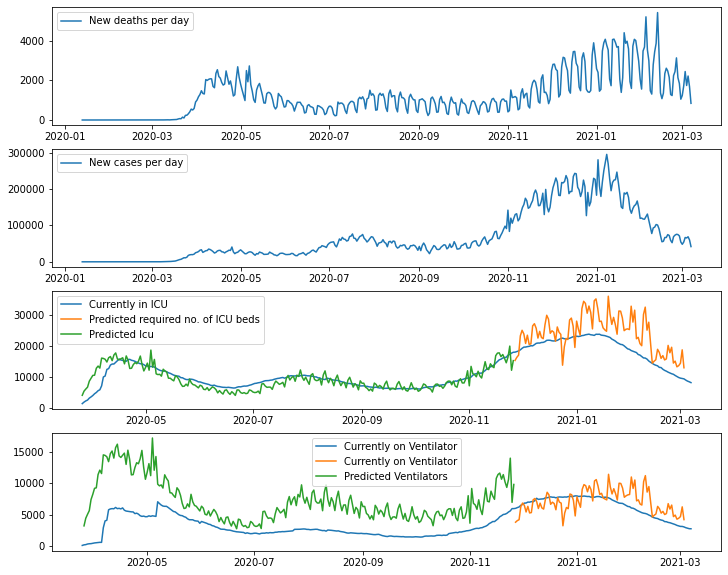

In [315]:
figs, axes = plt.subplots(4,1, figsize = (12,10))
axes[0].plot(df_national['date'], df_national['deathIncrease'], label='New deaths per day')

axes[1].plot(df_national['date'], df_national['positiveIncrease'], label='New cases per day')

axes[2].plot(df_national['date'], df_national['inIcuCurrently'], label='Currently in ICU')
axes[2].plot(df_spike['date'][4:], preds_icu_spike.detach().numpy(), label='Predicted required no. of ICU beds')
axes[2].plot(df['date'][4:], df_icu.values, label='Predicted Icu')

axes[3].plot(df_national['date'], df_national['onVentilatorCurrently'], label='Currently on Ventilator')
axes[3].plot(df_spike['date'][4:], preds_ventilators_spike.detach().numpy(), label='Currently on Ventilator')
axes[3].plot(df['date'][4:], df_ventilators.values, label='Predicted Ventilators')

for i in range(4):
  axes[i].legend()